In [1]:
import pymongo
import matplotlib.pyplot as plt

In [8]:
MONGODB_URL = 'mongodb://localhost:27017/'
DB_NAME = 'id-room-benchmark_02-28-2020_19:26'
COLLECTION_NAME = 'results'

client = pymongo.MongoClient(MONGODB_URL)
db = client[DB_NAME]
collection = db[COLLECTION_NAME]

#### Sucess Rate vs Fail Probability 

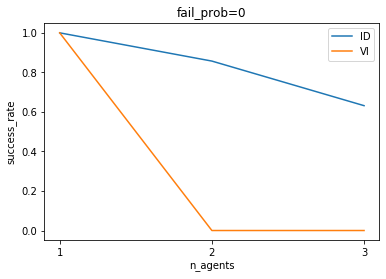

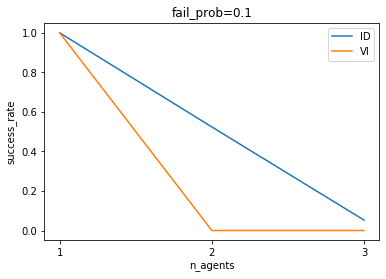

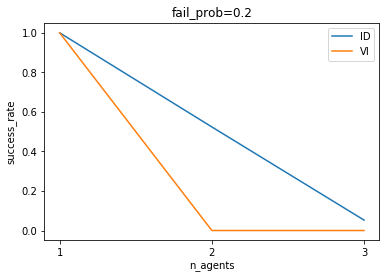

In [9]:
%matplotlib inline

for i, fail_prob in enumerate(collection.distinct('fail_prob')):
    x = []
    y_ID= []
    y_VI = []
    for n_agents in collection.distinct('n_agents'):
        # Caluclate ID success rate
        id_success = len(list(collection.find({'fail_prob':fail_prob, 'n_agents':n_agents, 'solver': 'ID', 'end_reason':'done'})))
        id_fail = len(list(collection.find({'fail_prob':fail_prob, 'n_agents':n_agents, 'solver': 'ID'}))) - id_success
        id_success_rate = id_success / (id_success + id_fail)

        # Calculate VI sucess rate
        vi_success = len(list(collection.find({'fail_prob':fail_prob, 'n_agents':n_agents, 'solver': 'VI', 'end_reason':'done'})))
        vi_fail = len(list(collection.find({'fail_prob':fail_prob, 'n_agents':n_agents, 'solver': 'VI'}))) - vi_success
        vi_success_rate = vi_success / (vi_success + vi_fail)
        
        x.append(n_agents)
        y_ID.append(id_success_rate)
        y_VI.append(vi_success_rate)
    
    plt.figure(i)
    plt.title(f'fail_prob={fail_prob}')
    plt.xticks(collection.distinct('n_agents'))
    plt.plot(x, y_ID, label='ID')
    plt.plot(x, y_VI, label='VI')
    plt.xlabel('n_agents')
    plt.ylabel('success_rate')
    plt.legend()